In [1]:
###############################
## Recovery Plots Gaussian ####
###############################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import rand, randn, choice, permutation
from scipy.linalg import hadamard

import torch
import torch.nn.functional as F

import tensorly as tl
from tensorly import decomposition
from tensorly.decomposition import parafac
from scipy import linalg

In [2]:
%run KZTIHT_Functions.ipynb
%run "Adaptive Row Removal Functions.ipynb"
%run Optimising_Trimming.ipynb
np.random.seed(9)

In [3]:
np.random.seed(9)
colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

In [4]:
itr = 200
num_samples = 50
thresh = 0.0001

In [5]:
def generate_recovery_plots(n_dim,r,compression_dim,num_high_search):
    
    cols = []
    data = []
    n = n_dim[0]*n_dim[1]*n_dim[2]
    k = 0
    
    for m in compression_dim:
    
        rec_IHT = 0
        rec_KZIHT = 0
        rec_ATIHT = 0
        rec_IHT_2 = 0
        cols = cols + ['kziht'+str(m), 'atiht'+str(m),'iht'+str(m) ]
        #print(m)
        median_data,num_high = plot_trim_HOSVD(r,m,n_dim,num_high = num_high_search)

        for samples in range(num_samples):
        
            X = random_low_rank_HOSVD(n_dim,r)
            x = vectorize_np(X)
            A = gaussian_mx(m,n)
            b = A@x 
            y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = 1, itr = itr)
            y_ATIHT, error_ATIHT = adaptive_TIHT(A,b,X,r,lamda = 1/m,mu = 1,itr=itr,numb_high = num_high)
            y_IHT_2,error_IHT_2 = TIHT_HOSVD(A,b,X,r,lamda=1/m,itr = itr)

            if  error_KZIHT[itr-1] < thresh and error_KZIHT[itr-1] >= 0:
                rec_KZIHT = rec_KZIHT + 1 
            if error_ATIHT[itr-1] < thresh and error_ATIHT[itr-1] >= 0:
                rec_ATIHT = rec_ATIHT + 1 
            if error_IHT_2[itr-1] < thresh and error_IHT_2[itr-1] >= 0:
                rec_IHT_2 = rec_IHT_2 + 1 
        
        data = data + [rec_KZIHT,rec_ATIHT,rec_IHT_2]
        k = k+1
    
    data_1 = data
    data = np.array(data)[...,None]
    data = pd.DataFrame(data.T,columns = cols)
    data.to_csv('Recovery_Gaussian_'+str(r[0])+'_'+str(r[1])+'_'+str(r[2])+'dim'+str(n)+'.csv', header = True)

    return data_1

In [6]:
n_dim = [15,15,15]

compression_dim = [600,700,800,900,1000,1100,1200,1300,1400,1500,1600]
high = [5,10,20,30,40]

r = [5,5,5]
data = generate_recovery_plots(n_dim = n_dim,r=r,compression_dim = compression_dim,num_high_search = high)

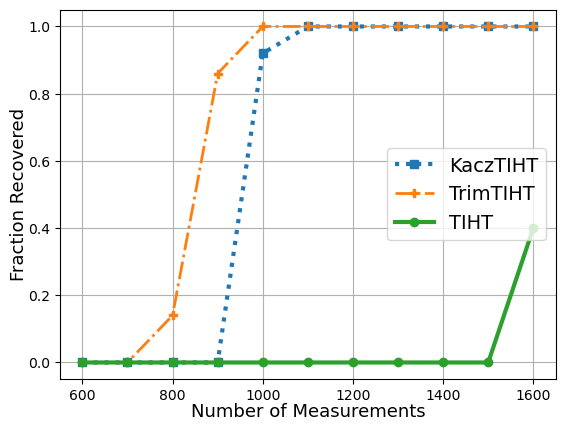

In [7]:
data_1 = pd.read_csv('Recovery_Gaussian_5_5_5dim3375.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))[0]
plt.figure()
plt.title("", pad = 30, loc = "center")
compression_dim = [600,700,800,900,1000,1100,1200,1300,1400,1500,1600]
plt.plot(compression_dim, data_1[0::3]/50, label = "KaczTIHT",linestyle = "dotted",linewidth=3, marker = "s")
plt.plot(compression_dim, data_1[1::3]/50, label = "TrimTIHT",linestyle = "dashdot",linewidth=2, marker = "P")
plt.plot(compression_dim, data_1[2::3]/50, label = "TIHT",linewidth=3,marker = "o")

subtitle_string = "Gaussian Measurements"

plt.legend(fontsize = '14', loc = "center right")
plt.xlabel(xlabel="Number of Measurements",labelpad = 0,fontsize = 13)
plt.ylabel(ylabel="Fraction Recovered",labelpad = 0,fontsize = 13)
plt.grid()
plt.savefig('Recovery_Gaussian_Step_3375_5_5_5.png', dpi=300,  bbox_inches="tight")

In [8]:
n_dim = [15,15,15]
compression_dim = [100,200,300,400,500,600,700,800,1000,1200,1300,1400]
high = [5,10,20,30,40]

r = [2,2,2]
data_2 = generate_recovery_plots(n_dim = n_dim,r=r,compression_dim = compression_dim,num_high_search = high)

/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/backend/core.py:736: RuntimeWarning: overflow encountered in square
  return self.sqrt(self.sum(self.abs(tensor) ** 2, axis=axis))
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/decomposition/_tucker.py:204: RuntimeWarning: invalid value encountered in scalar subtract
  rec_error = sqrt(abs(norm_tensor**2 - tl.norm(core, 2) ** 2)) / norm_tensor
/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2792: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
/tmp/ipykernel_3259935/116724860.py:24: RuntimeWarning: overflow encountered in multiply
  y = y + gamma*(b[t[j]] - a@y)*a/(np.linalg.norm(a)**2)
/tmp/ipykernel_3259935/116724860.py:24: Runti

Doesn't converge
Doesn't converge


/home/ss3472/.conda/envs/tensor-env/lib/python3.13/site-packages/tensorly/decomposition/_tucker.py:204: RuntimeWarning: invalid value encountered in scalar divide
  rec_error = sqrt(abs(norm_tensor**2 - tl.norm(core, 2) ** 2)) / norm_tensor


Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't converge
Doesn't conver

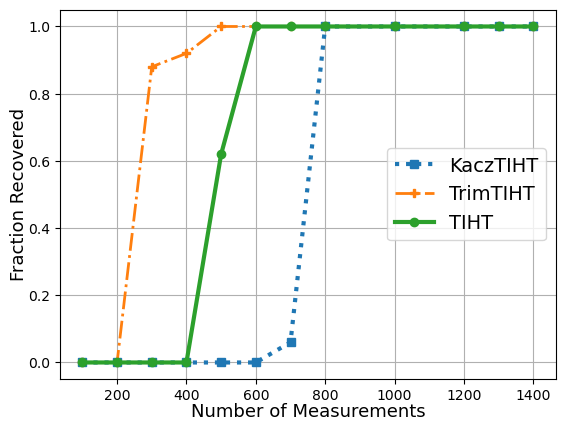

In [9]:
data_1 = pd.read_csv('Recovery_Gaussian_2_2_2dim3375.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))[0]
plt.figure()
plt.title("", pad = 30, loc = "center")
compression_dim = [100,200,300,400,500,600,700,800,1000,1200,1300,1400]
plt.plot(compression_dim, data_1[0::3]/50, label = "KaczTIHT",linestyle = "dotted",linewidth=3, marker = "s")
plt.plot(compression_dim, data_1[1::3]/50, label = "TrimTIHT",linestyle = "dashdot",linewidth=2, marker = "P")
plt.plot(compression_dim, data_1[2::3]/50, label = "TIHT",linewidth=3,marker = "o")

subtitle_string = "Gaussian Measurements"

plt.legend(fontsize = '14', loc = "center right")
plt.xlabel(xlabel="Number of Measurements",labelpad = 0,fontsize = 13)
plt.ylabel(ylabel="Fraction Recovered",labelpad = 0,fontsize = 13)
plt.grid()
plt.savefig('Recovery_Gaussian_Step_3375_2_2_2.png', dpi=300,  bbox_inches="tight")

In [10]:
########################
#### CP Rank ###########
#######################3

In [11]:
np.random.seed(9)
itr = 200
num_samples = 50
thresh = 0.0001

In [12]:
def generate_recovery_plots_CP(n_dim,r,compression_dim,num_high_search):
    
    cols = []
    data = []
    n = n_dim[0]*n_dim[1]*n_dim[2]
    k = 0
    
    for m in compression_dim:
    
        rec_IHT = 0
        rec_KZIHT = 0
        rec_ATIHT = 0
        rec_IHT_2 = 0
        cols = cols + ['kziht'+str(m), 'atiht'+str(m),'iht'+str(m) ]
        #print(m)
        median_data, num_high = plot_trim_CP(r,m,n_dim,num_high = num_high_search)

        for samples in range(num_samples):
        
            X = random_low_rank_CP(n_dim,r)
            x = vectorize_np(X)
            A = gaussian_mx(m,n)
            b = A@x 
            y_KZIHT, error_KZIHT = KZIHT_CP_RR(A,b,X,n,r,gamma = 1, itr = itr)
            y_ATIHT, error_ATIHT = adaptive_TIHT_CP(A,b,X,r,lamda = 1/m,mu = 1,itr=itr, numb_high = num_high)
            y_IHT_2,error_IHT_2 = TIHT_CP(A,b,X,r,lamda=1/m,itr = itr)

            if  error_KZIHT[itr-1] < thresh and error_KZIHT[itr-1] >= 0:
                rec_KZIHT = rec_KZIHT + 1 
            if error_ATIHT[itr-1] < thresh and error_ATIHT[itr-1] >= 0:
                rec_ATIHT = rec_ATIHT + 1 
            if error_IHT_2[itr-1] < thresh and error_IHT_2[itr-1] >= 0:
                rec_IHT_2 = rec_IHT_2 + 1 
        
        data = data + [rec_KZIHT,rec_ATIHT,rec_IHT_2]
        k = k+1
    
    data_1 = data
    data = np.array(data)[...,None]
    data = pd.DataFrame(data.T,columns = cols)
    data.to_csv('Recovery_Gaussian_CP_'+str(r)+'_dim'+str(n)+'.csv', header = True)

    return data_1

In [13]:
n_dim = [15,15,15]

compression_dim = [600,700,800,900,1000,1100,1200,1300,1400,1500,1600]
high = [5,10,20,30,40]
r = 5
data = generate_recovery_plots_CP(n_dim = n_dim,r=r,compression_dim = compression_dim,num_high_search = high)

/tmp/ipykernel_3259935/2982540138.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  WW = np.array(vectorize_np(vXX)) + lamda*np.matmul(AA.T, (yy - np.matmul(AA, np.array(vectorize_np(vXX)))))


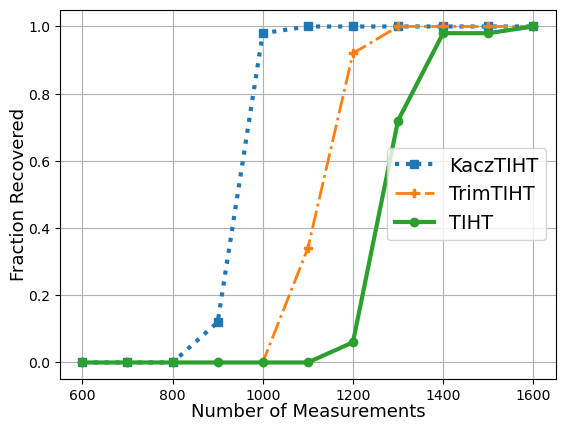

In [14]:
data_1 = pd.read_csv('Recovery_Gaussian_CP_5_dim3375.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))[0]
plt.figure()
plt.title("", pad = 30, loc = "center")
compression_dim = [600,700,800,900,1000,1100,1200,1300,1400,1500,1600]
plt.plot(compression_dim, data_1[0::3]/50, label = "KaczTIHT",linestyle = "dotted",linewidth=3, marker = "s")
plt.plot(compression_dim, data_1[1::3]/50, label = "TrimTIHT",linestyle = "dashdot",linewidth=2, marker = "P")
plt.plot(compression_dim, data_1[2::3]/50, label = "TIHT",linewidth=3,marker = "o")

subtitle_string = "Gaussian Measurements"

plt.legend(fontsize = '14', loc = "center right")
plt.xlabel(xlabel="Number of Measurements",labelpad = 0,fontsize = 13)
plt.ylabel(ylabel="Fraction Recovered",labelpad = 0,fontsize = 13)
plt.grid()
plt.savefig('Recovery_Gaussian_CP_3375_5.png', dpi=300,  bbox_inches="tight")